<a href="https://colab.research.google.com/github/ombhope/ma22c030_2023_pl/blob/main/Assignment%2014/MA22C030PLA14(Ovarian_cancer_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Separate features (X_dat) and labels (y_dat)
X_dat = data.data  # Features
y_dat = data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, y_dat, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # Updated: Specify a different number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

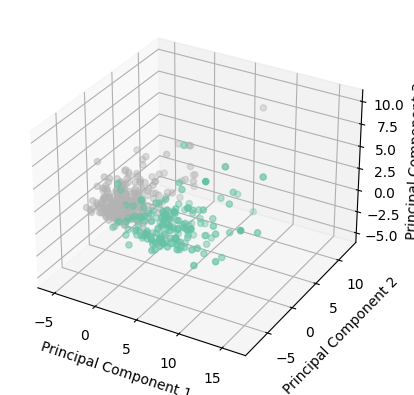

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality
import seaborn as sns  # Import seaborn for color palette

# Create a 3D scatter plot for the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first three principal components with colors based on the target labels (y_train)
ax.scatter(
    X_train_pca[:, 0],  # X-axis: Principal Component 1
    X_train_pca[:, 1],  # Y-axis: Principal Component 2
    X_train_pca[:, 2],  # Z-axis: Principal Component 3
    c=y_train,          # Color based on target labels
    cmap=sns.color_palette("Set2", as_cmap=True)  # Use Seaborn color palette
)

# Set labels for each axis
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the 3D plot
plt.show()


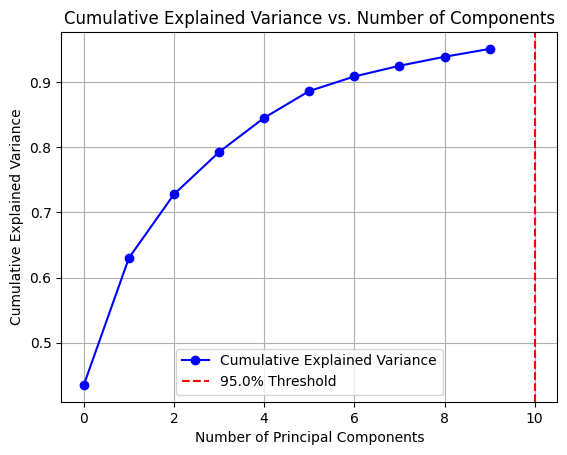

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate explained variance for each principal component
explained_var = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# Plot the cumulative explained variance
plt.plot(cumulative_var, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')

# Highlight the point where explained variance reaches a desired threshold (e.g., 95%)
threshold = 0.95
num_components_threshold = np.argmax(cumulative_var >= threshold) + 1
plt.axvline(x=num_components_threshold, color='r', linestyle='--', label=f'{threshold * 100:.1f}% Threshold')

# Set labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')

# Add legend
plt.legend()

# Display a grid
plt.grid(True)

# Show the plot
plt.show()

In [44]:
n_components_95 = np.where(cumulative_var >= 0.95)[0][0] + 1


print("Number of dimensions needed to keep 95% of the variance:", n_components_95)
print("Percentage of variance retained with 3 dimensions:", cumulative_var[2])
print("Percentage of variance lost when reducing from 4000 to 3 dimensions:", 1 - cumulative_var[2])

Number of dimensions needed to keep 95% of the variance: 10
Percentage of variance retained with 3 dimensions: 0.7278430734090061
Percentage of variance lost when reducing from 4000 to 3 dimensions: 0.2721569265909939


In [45]:
X_train.shape

(455, 30)